In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [8]:
from tqdm import tqdm

In [172]:
def create_dataset(parabola=0, ne_parabola=0, samples=10000):
    
    x_x_train = [random.uniform(-1,1)*10 for i in range(samples)]
    x_y_train = list(np.array(x_x_train)**2)
    y_train = list(np.ones(samples, dtype=int))
    
    x_x_train_u = [random.uniform(-2,2)*10 for i in range(samples)]
    x_y_train_u = [random.uniform(-2,2)*100 for i in range(samples)]
    y_train_u = list(np.zeros(samples, dtype=int))
    
    x_train = []
    for x,y in zip(x_x_train,x_y_train):
        x_train.append([x,y])
    
    x_train_u = []
    for x,y in zip(x_x_train_u,x_y_train_u):
        x_train_u.append([x,y])
        
    x_train = np.reshape(np.array(x_train),(samples,2))
    x_train_u = np.reshape(np.array(x_train_u),(samples,2))
    
    X_train = np.concatenate([x_train, x_train_u], axis=0)
    Y_train = np.concatenate([y_train, y_train_u], axis=0)
    
    X_train, Y_train = shuffle(X_train, Y_train, random_state=44)
    
    if (ne_parabola and parabola):
        return x_train, y_train, x_train_u, y_train_u, X_train, Y_train
    
    elif parabola:
        return x_train, y_train
    
    elif ne_parabola:
        return x_train_u, y_train_u
    
    return X_train, Y_train

In [173]:
x_train, y_train, x_train_u, y_train_u, X_train, Y_train = create_dataset (parabola = True, ne_parabola = True)

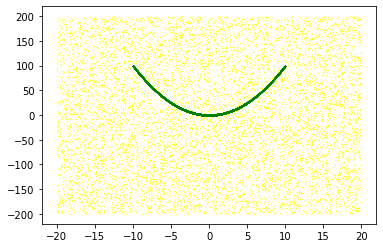

In [174]:
plt.scatter([x[0] for x in x_train_u],[x[1] for x in x_train_u], s= 0.1, c ='yellow')
plt.scatter([x[0] for x in x_train],[x[1] for x in x_train], s= 0.1, c ='green')

In [391]:
n_inputs=2
classificator = tf.keras.models.Sequential()
classificator.add(tf.keras.layers.Dense(25, kernel_initializer='he_uniform', input_dim=n_inputs, activation = tf.nn.leaky_relu))
classificator.add(tf.keras.layers.Dense(1, activation='sigmoid'))
classificator.compile(loss='binary_crossentropy', optimizer=tf.train.AdamOptimizer(learning_rate=0.001), metrics = ['accuracy'])

In [392]:
classificator.fit(X_train, Y_train, epochs=2)

Epoch 1/2
20000/20000 [==============================] - ETA: 14:21 - loss: 3.9126 - acc: 0.75 - ETA: 2:06 - loss: 3.0230 - acc: 0.7679 - ETA: 1:09 - loss: 3.2626 - acc: 0.747 - ETA: 46s - loss: 3.2443 - acc: 0.754 - ETA: 39s - loss: 3.0363 - acc: 0.76 - ETA: 31s - loss: 3.2358 - acc: 0.75 - ETA: 26s - loss: 3.2277 - acc: 0.75 - ETA: 22s - loss: 3.2715 - acc: 0.75 - ETA: 19s - loss: 3.3963 - acc: 0.74 - ETA: 18s - loss: 3.4621 - acc: 0.73 - ETA: 16s - loss: 3.5127 - acc: 0.73 - ETA: 15s - loss: 3.4381 - acc: 0.73 - ETA: 14s - loss: 3.3337 - acc: 0.72 - ETA: 13s - loss: 3.1896 - acc: 0.71 - ETA: 12s - loss: 3.1002 - acc: 0.70 - ETA: 12s - loss: 2.9666 - acc: 0.70 - ETA: 11s - loss: 2.8240 - acc: 0.70 - ETA: 10s - loss: 2.6970 - acc: 0.69 - ETA: 10s - loss: 2.5608 - acc: 0.69 - ETA: 9s - loss: 2.4513 - acc: 0.6976 - ETA: 9s - loss: 2.3620 - acc: 0.691 - ETA: 8s - loss: 2.2908 - acc: 0.691 - ETA: 8s - loss: 2.1851 - acc: 0.693 - ETA: 8s - loss: 2.1426 - acc: 0.692 - ETA: 8s - loss: 2.0867

20000/20000 [==============================] - ETA: 6s - loss: 0.3874 - acc: 0.843 - ETA: 4s - loss: 0.3616 - acc: 0.843 - ETA: 4s - loss: 0.3298 - acc: 0.870 - ETA: 5s - loss: 0.3330 - acc: 0.875 - ETA: 4s - loss: 0.3249 - acc: 0.876 - ETA: 4s - loss: 0.3205 - acc: 0.879 - ETA: 4s - loss: 0.3221 - acc: 0.884 - ETA: 4s - loss: 0.3204 - acc: 0.883 - ETA: 4s - loss: 0.3196 - acc: 0.885 - ETA: 4s - loss: 0.3195 - acc: 0.882 - ETA: 4s - loss: 0.3194 - acc: 0.881 - ETA: 4s - loss: 0.3240 - acc: 0.877 - ETA: 4s - loss: 0.3235 - acc: 0.878 - ETA: 4s - loss: 0.3238 - acc: 0.879 - ETA: 4s - loss: 0.3242 - acc: 0.877 - ETA: 4s - loss: 0.3289 - acc: 0.873 - ETA: 4s - loss: 0.3282 - acc: 0.874 - ETA: 4s - loss: 0.3267 - acc: 0.874 - ETA: 4s - loss: 0.3245 - acc: 0.877 - ETA: 4s - loss: 0.3272 - acc: 0.874 - ETA: 4s - loss: 0.3264 - acc: 0.876 - ETA: 4s - loss: 0.3280 - acc: 0.873 - ETA: 4s - loss: 0.3278 - acc: 0.873 - ETA: 4s - loss: 0.3290 - acc: 0.872 - ETA: 4s - loss: 0.3269 - acc: 0.874 - ETA

In [ ]:
classificator.evaluate(X_train, Y_train)

In [393]:
latent_dim=5
n_outputs=2
generator=tf.keras.models.Sequential()
generator.add(tf.keras.layers.Dense(16, kernel_initializer='he_uniform', input_dim=latent_dim, activation = tf.nn.leaky_relu))
generator.add(tf.keras.layers.Dense(n_outputs, activation='linear'))

In [394]:
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = tf.keras.models.Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer=tf.train.AdamOptimizer(learning_rate=0.001))
    return model

In [19]:
X1, Y1 = create_dataset()
    #x_train, y_train, x_test, y_test = train_test_split(X, Y, test_size=0.75, random_state=42)

In [21]:
X1.shape[0]

20000

In [ ]:
generated_points

In [395]:
def train(epochs=1, gan=0):

    # Build our GAN netowrk
    if gan==0:
        gan = define_gan(generator, classificator)

    for e in range(1, epochs+1):
        
        X, Y = create_dataset(samples=2000)
    #x_train, y_train, x_test, y_test = train_test_split(X, Y, test_size=0.75, random_state=42)
        size = X.shape[0]

        
        # Get a random set of input noise and images
        x_gan = np.random.normal(-1, 1, size=[size, 5])

        generated_points = generator.predict(x_gan)
        X1 = np.concatenate([X, generated_points])


        y_dis = np.concatenate([Y, np.zeros(size)])

        X1, y_dis = shuffle(X1, y_dis, random_state=44)

        # Train discriminator
        classificator.trainable = True
        classificator.fit(X1, y_dis)


        # Train generator
        noise = np.random.normal(-1, 1, size=[size*2, 5])
        y_gen = np.ones(size*2)
        classificator.trainable = False
        gan.fit(noise, y_gen)
        
        x_gan = np.random.normal(-1, 1, size=[10000, 5])
        generated_points = generator.predict(x_gan)
        preds_hist.append(generated_points)
        


    return gan

In [396]:
preds_hist=[]

In [309]:
for x in range(10):
    gan = train(epochs=5, gan=gan)
    plt.scatter([x[0] for x in preds_hist[-1]],[x[1] for x in preds_hist[-1]], s=0.1, alpha=1)
    plt.clf()

8000/8000 [==============================] - ETA: 1s - loss: 5.163 - ETA: 1s - loss: 2.226 - ETA: 1s - loss: 1.499 - ETA: 1s - loss: 1.269 - ETA: 1s - loss: 0.973 - ETA: 1s - loss: 0.804 - ETA: 1s - loss: 0.685 - ETA: 1s - loss: 0.608 - ETA: 1s - loss: 0.549 - ETA: 1s - loss: 0.507 - ETA: 1s - loss: 0.467 - ETA: 1s - loss: 0.434 - ETA: 0s - loss: 0.406 - ETA: 0s - loss: 0.382 - ETA: 0s - loss: 0.362 - ETA: 0s - loss: 0.342 - ETA: 0s - loss: 0.326 - ETA: 0s - loss: 0.313 - ETA: 0s - loss: 0.302 - ETA: 0s - loss: 0.289 - ETA: 0s - loss: 0.278 - ETA: 0s - loss: 0.269 - ETA: 0s - loss: 0.259 - ETA: 0s - loss: 0.252 - ETA: 0s - loss: 0.244 - ETA: 0s - loss: 0.238 - ETA: 0s - loss: 0.232 - ETA: 0s - loss: 0.226 - ETA: 0s - loss: 0.222 - ETA: 0s - loss: 0.217 - 2s 198us/sample - loss: 0.2131


8000/8000 [==============================] - ETA: 2s - loss: 5.083 - ETA: 2s - loss: 3.701 - ETA: 3s - loss: 2.595 - ETA: 2s - loss: 1.763 - ETA: 2s - loss: 1.594 - ETA: 2s - loss: 1.451 - ETA: 2s - loss: 1.341 - ETA: 2s - loss: 1.170 - ETA: 2s - loss: 1.055 - ETA: 2s - loss: 0.970 - ETA: 2s - loss: 0.916 - ETA: 2s - loss: 0.849 - ETA: 2s - loss: 0.794 - ETA: 2s - loss: 0.747 - ETA: 2s - loss: 0.716 - ETA: 2s - loss: 0.669 - ETA: 2s - loss: 0.636 - ETA: 2s - loss: 0.601 - ETA: 2s - loss: 0.576 - ETA: 2s - loss: 0.553 - ETA: 2s - loss: 0.527 - ETA: 2s - loss: 0.504 - ETA: 2s - loss: 0.476 - ETA: 1s - loss: 0.458 - ETA: 1s - loss: 0.436 - ETA: 1s - loss: 0.425 - ETA: 1s - loss: 0.411 - ETA: 1s - loss: 0.399 - ETA: 1s - loss: 0.385 - ETA: 1s - loss: 0.371 - ETA: 1s - loss: 0.361 - ETA: 1s - loss: 0.347 - ETA: 1s - loss: 0.341 - ETA: 1s - loss: 0.333 - ETA: 1s - loss: 0.327 - ETA: 1s - loss: 0.320 - ETA: 1s - loss: 0.319 - ETA: 1s - loss: 0.315 - ETA: 0s - loss: 0.309 - ETA: 0s - loss: 0.3

8000/8000 [==============================] - ETA: 2s - loss: 5.293 - ETA: 2s - loss: 3.425 - ETA: 2s - loss: 2.352 - ETA: 2s - loss: 1.798 - ETA: 2s - loss: 1.546 - ETA: 2s - loss: 1.334 - ETA: 2s - loss: 1.132 - ETA: 2s - loss: 0.948 - ETA: 2s - loss: 0.837 - ETA: 2s - loss: 0.763 - ETA: 2s - loss: 0.714 - ETA: 1s - loss: 0.654 - ETA: 1s - loss: 0.612 - ETA: 1s - loss: 0.577 - ETA: 1s - loss: 0.546 - ETA: 1s - loss: 0.524 - ETA: 1s - loss: 0.500 - ETA: 1s - loss: 0.479 - ETA: 1s - loss: 0.452 - ETA: 1s - loss: 0.436 - ETA: 1s - loss: 0.421 - ETA: 1s - loss: 0.402 - ETA: 1s - loss: 0.385 - ETA: 1s - loss: 0.372 - ETA: 1s - loss: 0.358 - ETA: 1s - loss: 0.346 - ETA: 1s - loss: 0.334 - ETA: 0s - loss: 0.323 - ETA: 0s - loss: 0.316 - ETA: 0s - loss: 0.306 - ETA: 0s - loss: 0.299 - ETA: 0s - loss: 0.292 - ETA: 0s - loss: 0.285 - ETA: 0s - loss: 0.278 - ETA: 0s - loss: 0.271 - ETA: 0s - loss: 0.267 - ETA: 0s - loss: 0.262 - ETA: 0s - loss: 0.258 - ETA: 0s - loss: 0.256 - ETA: 0s - loss: 0.2

8000/8000 [==============================] - ETA: 1s - loss: 5.567 - ETA: 2s - loss: 4.084 - ETA: 2s - loss: 2.447 - ETA: 2s - loss: 2.133 - ETA: 2s - loss: 1.906 - ETA: 2s - loss: 1.606 - ETA: 2s - loss: 1.361 - ETA: 2s - loss: 1.141 - ETA: 1s - loss: 1.024 - ETA: 1s - loss: 0.917 - ETA: 1s - loss: 0.843 - ETA: 1s - loss: 0.811 - ETA: 1s - loss: 0.764 - ETA: 1s - loss: 0.715 - ETA: 1s - loss: 0.674 - ETA: 1s - loss: 0.650 - ETA: 1s - loss: 0.623 - ETA: 1s - loss: 0.594 - ETA: 1s - loss: 0.561 - ETA: 1s - loss: 0.536 - ETA: 1s - loss: 0.517 - ETA: 1s - loss: 0.502 - ETA: 1s - loss: 0.491 - ETA: 1s - loss: 0.476 - ETA: 1s - loss: 0.465 - ETA: 1s - loss: 0.450 - ETA: 0s - loss: 0.437 - ETA: 0s - loss: 0.423 - ETA: 0s - loss: 0.413 - ETA: 0s - loss: 0.406 - ETA: 0s - loss: 0.402 - ETA: 0s - loss: 0.393 - ETA: 0s - loss: 0.386 - ETA: 0s - loss: 0.380 - ETA: 0s - loss: 0.374 - ETA: 0s - loss: 0.367 - ETA: 0s - loss: 0.360 - ETA: 0s - loss: 0.354 - ETA: 0s - loss: 0.349 - ETA: 0s - loss: 0.3

8000/8000 [==============================] - ETA: 3s - loss: 2.860 - ETA: 2s - loss: 1.333 - ETA: 2s - loss: 0.983 - ETA: 2s - loss: 0.823 - ETA: 2s - loss: 0.712 - ETA: 1s - loss: 0.622 - ETA: 1s - loss: 0.558 - ETA: 1s - loss: 0.518 - ETA: 1s - loss: 0.483 - ETA: 1s - loss: 0.454 - ETA: 1s - loss: 0.437 - ETA: 1s - loss: 0.413 - ETA: 1s - loss: 0.396 - ETA: 1s - loss: 0.385 - ETA: 1s - loss: 0.371 - ETA: 1s - loss: 0.359 - ETA: 1s - loss: 0.349 - ETA: 1s - loss: 0.346 - ETA: 1s - loss: 0.337 - ETA: 1s - loss: 0.329 - ETA: 1s - loss: 0.323 - ETA: 1s - loss: 0.319 - ETA: 1s - loss: 0.312 - ETA: 1s - loss: 0.309 - ETA: 1s - loss: 0.306 - ETA: 1s - loss: 0.302 - ETA: 1s - loss: 0.300 - ETA: 1s - loss: 0.298 - ETA: 1s - loss: 0.294 - ETA: 1s - loss: 0.292 - ETA: 1s - loss: 0.288 - ETA: 1s - loss: 0.285 - ETA: 1s - loss: 0.282 - ETA: 1s - loss: 0.279 - ETA: 1s - loss: 0.277 - ETA: 1s - loss: 0.275 - ETA: 1s - loss: 0.273 - ETA: 0s - loss: 0.269 - ETA: 0s - loss: 0.267 - ETA: 0s - loss: 0.2

8000/8000 [==============================] - ETA: 1s - loss: 0.8390 - acc: 0.593 - ETA: 2s - loss: 0.4676 - acc: 0.817 - ETA: 1s - loss: 0.5220 - acc: 0.875 - ETA: 1s - loss: 0.4499 - acc: 0.896 - ETA: 1s - loss: 0.3843 - acc: 0.913 - ETA: 1s - loss: 0.3485 - acc: 0.917 - ETA: 1s - loss: 0.3233 - acc: 0.921 - ETA: 1s - loss: 0.3024 - acc: 0.926 - ETA: 1s - loss: 0.2772 - acc: 0.932 - ETA: 1s - loss: 0.2572 - acc: 0.936 - ETA: 1s - loss: 0.2437 - acc: 0.940 - ETA: 1s - loss: 0.2378 - acc: 0.939 - ETA: 1s - loss: 0.2275 - acc: 0.941 - ETA: 1s - loss: 0.2211 - acc: 0.941 - ETA: 1s - loss: 0.2174 - acc: 0.941 - ETA: 1s - loss: 0.2136 - acc: 0.943 - ETA: 1s - loss: 0.2131 - acc: 0.942 - ETA: 1s - loss: 0.2098 - acc: 0.943 - ETA: 1s - loss: 0.2059 - acc: 0.943 - ETA: 1s - loss: 0.2016 - acc: 0.944 - ETA: 1s - loss: 0.1999 - acc: 0.945 - ETA: 1s - loss: 0.1941 - acc: 0.946 - ETA: 0s - loss: 0.1925 - acc: 0.946 - ETA: 0s - loss: 0.1896 - acc: 0.946 - ETA: 0s - loss: 0.1877 - acc: 0.947 - ETA: 

8000/8000 [==============================] - ETA: 1s - loss: 1.0351 - acc: 0.562 - ETA: 2s - loss: 0.5368 - acc: 0.763 - ETA: 2s - loss: 0.6120 - acc: 0.801 - ETA: 1s - loss: 0.5478 - acc: 0.854 - ETA: 1s - loss: 0.4525 - acc: 0.877 - ETA: 1s - loss: 0.3796 - acc: 0.896 - ETA: 1s - loss: 0.3288 - acc: 0.907 - ETA: 1s - loss: 0.2920 - acc: 0.918 - ETA: 1s - loss: 0.2650 - acc: 0.926 - ETA: 1s - loss: 0.2452 - acc: 0.932 - ETA: 1s - loss: 0.2221 - acc: 0.938 - ETA: 1s - loss: 0.2022 - acc: 0.944 - ETA: 1s - loss: 0.1853 - acc: 0.948 - ETA: 1s - loss: 0.1755 - acc: 0.952 - ETA: 1s - loss: 0.1677 - acc: 0.954 - ETA: 1s - loss: 0.1603 - acc: 0.956 - ETA: 1s - loss: 0.1508 - acc: 0.959 - ETA: 1s - loss: 0.1450 - acc: 0.960 - ETA: 0s - loss: 0.1399 - acc: 0.962 - ETA: 0s - loss: 0.1333 - acc: 0.964 - ETA: 0s - loss: 0.1306 - acc: 0.964 - ETA: 0s - loss: 0.1262 - acc: 0.965 - ETA: 0s - loss: 0.1227 - acc: 0.967 - ETA: 0s - loss: 0.1185 - acc: 0.968 - ETA: 0s - loss: 0.1158 - acc: 0.969 - ETA: 

8000/8000 [==============================] - ETA: 1s - loss: 1.9519 - acc: 0.500 - ETA: 1s - loss: 0.7756 - acc: 0.794 - ETA: 1s - loss: 1.1897 - acc: 0.823 - ETA: 1s - loss: 1.0668 - acc: 0.853 - ETA: 1s - loss: 1.0100 - acc: 0.864 - ETA: 1s - loss: 0.8918 - acc: 0.872 - ETA: 1s - loss: 0.7684 - acc: 0.883 - ETA: 1s - loss: 0.6557 - acc: 0.898 - ETA: 1s - loss: 0.5944 - acc: 0.903 - ETA: 1s - loss: 0.5547 - acc: 0.907 - ETA: 1s - loss: 0.5325 - acc: 0.908 - ETA: 1s - loss: 0.4981 - acc: 0.911 - ETA: 1s - loss: 0.4744 - acc: 0.913 - ETA: 1s - loss: 0.4516 - acc: 0.915 - ETA: 1s - loss: 0.4271 - acc: 0.919 - ETA: 1s - loss: 0.4125 - acc: 0.919 - ETA: 1s - loss: 0.3976 - acc: 0.922 - ETA: 0s - loss: 0.3842 - acc: 0.922 - ETA: 0s - loss: 0.3722 - acc: 0.924 - ETA: 0s - loss: 0.3629 - acc: 0.925 - ETA: 0s - loss: 0.3541 - acc: 0.926 - ETA: 0s - loss: 0.3446 - acc: 0.927 - ETA: 0s - loss: 0.3329 - acc: 0.929 - ETA: 0s - loss: 0.3242 - acc: 0.931 - ETA: 0s - loss: 0.3147 - acc: 0.932 - ETA: 

8000/8000 [==============================] - ETA: 1s - loss: 1.4268 - acc: 0.343 - ETA: 1s - loss: 0.7083 - acc: 0.784 - ETA: 1s - loss: 0.5133 - acc: 0.853 - ETA: 1s - loss: 0.4018 - acc: 0.889 - ETA: 1s - loss: 0.3194 - acc: 0.908 - ETA: 1s - loss: 0.2750 - acc: 0.920 - ETA: 1s - loss: 0.2395 - acc: 0.930 - ETA: 1s - loss: 0.2172 - acc: 0.934 - ETA: 1s - loss: 0.1972 - acc: 0.942 - ETA: 1s - loss: 0.1803 - acc: 0.946 - ETA: 1s - loss: 0.1675 - acc: 0.950 - ETA: 1s - loss: 0.1570 - acc: 0.953 - ETA: 1s - loss: 0.1472 - acc: 0.957 - ETA: 1s - loss: 0.1360 - acc: 0.960 - ETA: 1s - loss: 0.1257 - acc: 0.964 - ETA: 1s - loss: 0.1190 - acc: 0.966 - ETA: 0s - loss: 0.1130 - acc: 0.968 - ETA: 0s - loss: 0.1074 - acc: 0.970 - ETA: 0s - loss: 0.1045 - acc: 0.970 - ETA: 0s - loss: 0.1012 - acc: 0.971 - ETA: 0s - loss: 0.0988 - acc: 0.972 - ETA: 0s - loss: 0.0966 - acc: 0.973 - ETA: 0s - loss: 0.0940 - acc: 0.974 - ETA: 0s - loss: 0.0933 - acc: 0.974 - ETA: 0s - loss: 0.0908 - acc: 0.975 - ETA: 

8000/8000 [==============================] - ETA: 1s - loss: 1.6142 - acc: 0.437 - ETA: 2s - loss: 0.7525 - acc: 0.745 - ETA: 1s - loss: 0.7638 - acc: 0.812 - ETA: 1s - loss: 0.6328 - acc: 0.846 - ETA: 1s - loss: 0.5594 - acc: 0.861 - ETA: 1s - loss: 0.5116 - acc: 0.867 - ETA: 1s - loss: 0.4624 - acc: 0.879 - ETA: 1s - loss: 0.4261 - acc: 0.885 - ETA: 1s - loss: 0.3908 - acc: 0.893 - ETA: 1s - loss: 0.3709 - acc: 0.898 - ETA: 1s - loss: 0.3534 - acc: 0.900 - ETA: 1s - loss: 0.3394 - acc: 0.905 - ETA: 1s - loss: 0.3210 - acc: 0.909 - ETA: 1s - loss: 0.3091 - acc: 0.911 - ETA: 1s - loss: 0.3040 - acc: 0.912 - ETA: 1s - loss: 0.2916 - acc: 0.916 - ETA: 0s - loss: 0.2843 - acc: 0.918 - ETA: 0s - loss: 0.2741 - acc: 0.921 - ETA: 0s - loss: 0.2699 - acc: 0.922 - ETA: 0s - loss: 0.2631 - acc: 0.924 - ETA: 0s - loss: 0.2606 - acc: 0.924 - ETA: 0s - loss: 0.2563 - acc: 0.925 - ETA: 0s - loss: 0.2543 - acc: 0.926 - ETA: 0s - loss: 0.2498 - acc: 0.927 - ETA: 0s - loss: 0.2467 - acc: 0.927 - ETA: 

8000/8000 [==============================] - ETA: 1s - loss: 1.6310 - acc: 0.468 - ETA: 1s - loss: 0.7574 - acc: 0.771 - ETA: 1s - loss: 0.6240 - acc: 0.823 - ETA: 1s - loss: 0.5002 - acc: 0.858 - ETA: 1s - loss: 0.3931 - acc: 0.884 - ETA: 1s - loss: 0.3161 - acc: 0.907 - ETA: 1s - loss: 0.2831 - acc: 0.919 - ETA: 1s - loss: 0.2564 - acc: 0.927 - ETA: 1s - loss: 0.2261 - acc: 0.936 - ETA: 1s - loss: 0.2141 - acc: 0.939 - ETA: 1s - loss: 0.1990 - acc: 0.944 - ETA: 1s - loss: 0.1951 - acc: 0.945 - ETA: 1s - loss: 0.1849 - acc: 0.948 - ETA: 1s - loss: 0.1750 - acc: 0.951 - ETA: 1s - loss: 0.1646 - acc: 0.954 - ETA: 1s - loss: 0.1549 - acc: 0.957 - ETA: 1s - loss: 0.1459 - acc: 0.960 - ETA: 1s - loss: 0.1424 - acc: 0.961 - ETA: 0s - loss: 0.1366 - acc: 0.963 - ETA: 0s - loss: 0.1312 - acc: 0.965 - ETA: 0s - loss: 0.1287 - acc: 0.965 - ETA: 0s - loss: 0.1239 - acc: 0.967 - ETA: 0s - loss: 0.1197 - acc: 0.968 - ETA: 0s - loss: 0.1168 - acc: 0.968 - ETA: 0s - loss: 0.1133 - acc: 0.970 - ETA: 

8000/8000 [==============================] - ETA: 1s - loss: 3.417 - ETA: 2s - loss: 2.720 - ETA: 1s - loss: 2.542 - ETA: 1s - loss: 2.349 - ETA: 1s - loss: 2.247 - ETA: 1s - loss: 2.127 - ETA: 1s - loss: 2.014 - ETA: 1s - loss: 1.905 - ETA: 1s - loss: 1.793 - ETA: 1s - loss: 1.684 - ETA: 1s - loss: 1.584 - ETA: 1s - loss: 1.489 - ETA: 1s - loss: 1.382 - ETA: 1s - loss: 1.297 - ETA: 1s - loss: 1.225 - ETA: 0s - loss: 1.173 - ETA: 0s - loss: 1.124 - ETA: 0s - loss: 1.082 - ETA: 0s - loss: 1.036 - ETA: 0s - loss: 0.989 - ETA: 0s - loss: 0.956 - ETA: 0s - loss: 0.930 - ETA: 0s - loss: 0.901 - ETA: 0s - loss: 0.870 - ETA: 0s - loss: 0.837 - ETA: 0s - loss: 0.811 - ETA: 0s - loss: 0.783 - ETA: 0s - loss: 0.756 - ETA: 0s - loss: 0.734 - ETA: 0s - loss: 0.714 - ETA: 0s - loss: 0.692 - ETA: 0s - loss: 0.671 - ETA: 0s - loss: 0.652 - ETA: 0s - loss: 0.633 - ETA: 0s - loss: 0.617 - 2s 227us/sample - loss: 0.6150


8000/8000 [==============================] - ETA: 1s - loss: 2.754 - ETA: 1s - loss: 2.601 - ETA: 1s - loss: 2.477 - ETA: 1s - loss: 2.340 - ETA: 1s - loss: 2.196 - ETA: 1s - loss: 2.037 - ETA: 1s - loss: 1.893 - ETA: 1s - loss: 1.800 - ETA: 1s - loss: 1.709 - ETA: 1s - loss: 1.622 - ETA: 1s - loss: 1.549 - ETA: 1s - loss: 1.470 - ETA: 1s - loss: 1.420 - ETA: 1s - loss: 1.365 - ETA: 1s - loss: 1.305 - ETA: 1s - loss: 1.234 - ETA: 1s - loss: 1.162 - ETA: 1s - loss: 1.111 - ETA: 0s - loss: 1.056 - ETA: 0s - loss: 1.005 - ETA: 0s - loss: 0.952 - ETA: 0s - loss: 0.915 - ETA: 0s - loss: 0.876 - ETA: 0s - loss: 0.835 - ETA: 0s - loss: 0.802 - ETA: 0s - loss: 0.780 - ETA: 0s - loss: 0.755 - ETA: 0s - loss: 0.729 - ETA: 0s - loss: 0.704 - ETA: 0s - loss: 0.677 - ETA: 0s - loss: 0.653 - ETA: 0s - loss: 0.636 - ETA: 0s - loss: 0.617 - ETA: 0s - loss: 0.594 - ETA: 0s - loss: 0.578 - ETA: 0s - loss: 0.561 - 2s 238us/sample - loss: 0.5530


8000/8000 [==============================] - ETA: 1s - loss: 4.939 - ETA: 2s - loss: 2.773 - ETA: 2s - loss: 1.567 - ETA: 1s - loss: 1.179 - ETA: 1s - loss: 1.001 - ETA: 1s - loss: 0.852 - ETA: 1s - loss: 0.750 - ETA: 1s - loss: 0.640 - ETA: 1s - loss: 0.557 - ETA: 1s - loss: 0.502 - ETA: 1s - loss: 0.451 - ETA: 1s - loss: 0.410 - ETA: 1s - loss: 0.371 - ETA: 1s - loss: 0.336 - ETA: 1s - loss: 0.314 - ETA: 1s - loss: 0.294 - ETA: 1s - loss: 0.277 - ETA: 1s - loss: 0.260 - ETA: 0s - loss: 0.246 - ETA: 0s - loss: 0.232 - ETA: 0s - loss: 0.221 - ETA: 0s - loss: 0.213 - ETA: 0s - loss: 0.205 - ETA: 0s - loss: 0.197 - ETA: 0s - loss: 0.190 - ETA: 0s - loss: 0.182 - ETA: 0s - loss: 0.176 - ETA: 0s - loss: 0.173 - ETA: 0s - loss: 0.169 - ETA: 0s - loss: 0.163 - ETA: 0s - loss: 0.158 - ETA: 0s - loss: 0.154 - ETA: 0s - loss: 0.149 - ETA: 0s - loss: 0.144 - ETA: 0s - loss: 0.140 - ETA: 0s - loss: 0.137 - 2s 238us/sample - loss: 0.1367


8000/8000 [==============================] - ETA: 2s - loss: 4.084 - ETA: 1s - loss: 2.464 - ETA: 1s - loss: 1.472 - ETA: 1s - loss: 1.152 - ETA: 3s - loss: 1.028 - ETA: 2s - loss: 0.881 - ETA: 2s - loss: 0.713 - ETA: 2s - loss: 0.596 - ETA: 2s - loss: 0.528 - ETA: 1s - loss: 0.470 - ETA: 1s - loss: 0.429 - ETA: 1s - loss: 0.390 - ETA: 1s - loss: 0.359 - ETA: 1s - loss: 0.336 - ETA: 1s - loss: 0.316 - ETA: 1s - loss: 0.298 - ETA: 1s - loss: 0.279 - ETA: 1s - loss: 0.266 - ETA: 1s - loss: 0.254 - ETA: 0s - loss: 0.245 - ETA: 0s - loss: 0.235 - ETA: 0s - loss: 0.230 - ETA: 0s - loss: 0.222 - ETA: 0s - loss: 0.215 - ETA: 0s - loss: 0.211 - ETA: 0s - loss: 0.205 - ETA: 0s - loss: 0.199 - ETA: 0s - loss: 0.194 - ETA: 0s - loss: 0.190 - ETA: 0s - loss: 0.185 - ETA: 0s - loss: 0.179 - ETA: 0s - loss: 0.174 - ETA: 0s - loss: 0.170 - ETA: 0s - loss: 0.165 - ETA: 0s - loss: 0.161 - ETA: 0s - loss: 0.157 - 2s 257us/sample - loss: 0.1551


8000/8000 [==============================] - ETA: 1s - loss: 2.873 - ETA: 2s - loss: 2.529 - ETA: 1s - loss: 2.204 - ETA: 1s - loss: 1.868 - ETA: 1s - loss: 1.527 - ETA: 1s - loss: 1.265 - ETA: 1s - loss: 1.092 - ETA: 1s - loss: 0.944 - ETA: 1s - loss: 0.846 - ETA: 1s - loss: 0.747 - ETA: 1s - loss: 0.684 - ETA: 1s - loss: 0.626 - ETA: 1s - loss: 0.576 - ETA: 1s - loss: 0.536 - ETA: 1s - loss: 0.505 - ETA: 0s - loss: 0.477 - ETA: 0s - loss: 0.459 - ETA: 0s - loss: 0.441 - ETA: 0s - loss: 0.421 - ETA: 0s - loss: 0.403 - ETA: 0s - loss: 0.387 - ETA: 0s - loss: 0.370 - ETA: 0s - loss: 0.355 - ETA: 0s - loss: 0.340 - ETA: 0s - loss: 0.327 - ETA: 0s - loss: 0.314 - ETA: 0s - loss: 0.303 - ETA: 0s - loss: 0.292 - ETA: 0s - loss: 0.282 - ETA: 0s - loss: 0.274 - ETA: 0s - loss: 0.266 - ETA: 0s - loss: 0.259 - ETA: 0s - loss: 0.252 - ETA: 0s - loss: 0.245 - 2s 226us/sample - loss: 0.2416


8000/8000 [==============================] - ETA: 1s - loss: 2.970 - ETA: 1s - loss: 1.860 - ETA: 1s - loss: 1.687 - ETA: 1s - loss: 1.647 - ETA: 1s - loss: 1.579 - ETA: 1s - loss: 1.467 - ETA: 1s - loss: 1.394 - ETA: 1s - loss: 1.335 - ETA: 1s - loss: 1.277 - ETA: 1s - loss: 1.233 - ETA: 1s - loss: 1.194 - ETA: 1s - loss: 1.154 - ETA: 1s - loss: 1.119 - ETA: 1s - loss: 1.088 - ETA: 1s - loss: 1.062 - ETA: 0s - loss: 1.040 - ETA: 0s - loss: 1.018 - ETA: 0s - loss: 0.995 - ETA: 0s - loss: 0.974 - ETA: 0s - loss: 0.959 - ETA: 0s - loss: 0.941 - ETA: 0s - loss: 0.918 - ETA: 0s - loss: 0.899 - ETA: 0s - loss: 0.873 - ETA: 0s - loss: 0.843 - ETA: 0s - loss: 0.820 - ETA: 0s - loss: 0.791 - ETA: 0s - loss: 0.773 - ETA: 0s - loss: 0.749 - ETA: 0s - loss: 0.730 - ETA: 0s - loss: 0.708 - ETA: 0s - loss: 0.694 - ETA: 0s - loss: 0.672 - ETA: 0s - loss: 0.653 - ETA: 0s - loss: 0.634 - 2s 234us/sample - loss: 0.6244


8000/8000 [==============================] - ETA: 1s - loss: 6.084 - ETA: 1s - loss: 3.711 - ETA: 1s - loss: 2.162 - ETA: 1s - loss: 1.637 - ETA: 1s - loss: 1.473 - ETA: 1s - loss: 1.220 - ETA: 1s - loss: 1.032 - ETA: 1s - loss: 0.874 - ETA: 1s - loss: 0.771 - ETA: 1s - loss: 0.682 - ETA: 1s - loss: 0.628 - ETA: 1s - loss: 0.568 - ETA: 1s - loss: 0.520 - ETA: 1s - loss: 0.489 - ETA: 1s - loss: 0.457 - ETA: 1s - loss: 0.430 - ETA: 1s - loss: 0.400 - ETA: 0s - loss: 0.376 - ETA: 0s - loss: 0.353 - ETA: 0s - loss: 0.335 - ETA: 0s - loss: 0.319 - ETA: 0s - loss: 0.307 - ETA: 0s - loss: 0.294 - ETA: 0s - loss: 0.286 - ETA: 0s - loss: 0.275 - ETA: 0s - loss: 0.265 - ETA: 0s - loss: 0.260 - ETA: 0s - loss: 0.252 - ETA: 0s - loss: 0.244 - ETA: 0s - loss: 0.235 - ETA: 0s - loss: 0.230 - ETA: 0s - loss: 0.224 - ETA: 0s - loss: 0.219 - ETA: 0s - loss: 0.215 - ETA: 0s - loss: 0.210 - 2s 235us/sample - loss: 0.2052


<Figure size 432x288 with 0 Axes>

In [440]:
gan = train(epochs=10, gan=gan)

8000/8000 [==============================] - ETA: 1s - loss: 1.188 - ETA: 2s - loss: 1.180 - ETA: 2s - loss: 1.140 - ETA: 2s - loss: 1.090 - ETA: 2s - loss: 1.070 - ETA: 1s - loss: 1.038 - ETA: 1s - loss: 1.017 - ETA: 1s - loss: 0.998 - ETA: 1s - loss: 0.979 - ETA: 1s - loss: 0.970 - ETA: 1s - loss: 0.959 - ETA: 1s - loss: 0.951 - ETA: 1s - loss: 0.940 - ETA: 1s - loss: 0.933 - ETA: 1s - loss: 0.927 - ETA: 1s - loss: 0.922 - ETA: 1s - loss: 0.916 - ETA: 1s - loss: 0.910 - ETA: 1s - loss: 0.906 - ETA: 1s - loss: 0.904 - ETA: 1s - loss: 0.899 - ETA: 1s - loss: 0.897 - ETA: 1s - loss: 0.894 - ETA: 0s - loss: 0.892 - ETA: 0s - loss: 0.890 - ETA: 0s - loss: 0.889 - ETA: 0s - loss: 0.886 - ETA: 0s - loss: 0.884 - ETA: 0s - loss: 0.883 - ETA: 0s - loss: 0.881 - ETA: 0s - loss: 0.880 - ETA: 0s - loss: 0.879 - ETA: 0s - loss: 0.878 - ETA: 0s - loss: 0.877 - ETA: 0s - loss: 0.875 - ETA: 0s - loss: 0.874 - ETA: 0s - loss: 0.873 - ETA: 0s - loss: 0.871 - ETA: 0s - loss: 0.870 - 2s 261us/sample - l

8000/8000 [==============================] - ETA: 0s - loss: 0.4347 - acc: 0.781 - ETA: 2s - loss: 0.5036 - acc: 0.741 - ETA: 2s - loss: 0.5216 - acc: 0.726 - ETA: 2s - loss: 0.5113 - acc: 0.725 - ETA: 2s - loss: 0.4953 - acc: 0.744 - ETA: 1s - loss: 0.5029 - acc: 0.732 - ETA: 1s - loss: 0.4978 - acc: 0.732 - ETA: 1s - loss: 0.4852 - acc: 0.738 - ETA: 1s - loss: 0.4720 - acc: 0.747 - ETA: 1s - loss: 0.4674 - acc: 0.748 - ETA: 1s - loss: 0.4665 - acc: 0.745 - ETA: 1s - loss: 0.4638 - acc: 0.745 - ETA: 1s - loss: 0.4602 - acc: 0.746 - ETA: 1s - loss: 0.4558 - acc: 0.751 - ETA: 1s - loss: 0.4509 - acc: 0.755 - ETA: 1s - loss: 0.4518 - acc: 0.753 - ETA: 1s - loss: 0.4503 - acc: 0.755 - ETA: 1s - loss: 0.4495 - acc: 0.755 - ETA: 1s - loss: 0.4519 - acc: 0.752 - ETA: 1s - loss: 0.4543 - acc: 0.749 - ETA: 1s - loss: 0.4542 - acc: 0.749 - ETA: 1s - loss: 0.4521 - acc: 0.750 - ETA: 1s - loss: 0.4502 - acc: 0.751 - ETA: 0s - loss: 0.4489 - acc: 0.753 - ETA: 0s - loss: 0.4461 - acc: 0.755 - ETA: 

8000/8000 [==============================] - ETA: 1s - loss: 0.6630 - acc: 0.531 - ETA: 1s - loss: 0.5556 - acc: 0.679 - ETA: 2s - loss: 0.5465 - acc: 0.704 - ETA: 1s - loss: 0.5277 - acc: 0.728 - ETA: 1s - loss: 0.5033 - acc: 0.747 - ETA: 1s - loss: 0.5040 - acc: 0.752 - ETA: 1s - loss: 0.4903 - acc: 0.768 - ETA: 1s - loss: 0.4843 - acc: 0.766 - ETA: 1s - loss: 0.4858 - acc: 0.760 - ETA: 1s - loss: 0.4852 - acc: 0.757 - ETA: 1s - loss: 0.4808 - acc: 0.759 - ETA: 1s - loss: 0.4751 - acc: 0.760 - ETA: 1s - loss: 0.4715 - acc: 0.762 - ETA: 1s - loss: 0.4721 - acc: 0.760 - ETA: 1s - loss: 0.4724 - acc: 0.757 - ETA: 1s - loss: 0.4690 - acc: 0.758 - ETA: 1s - loss: 0.4659 - acc: 0.760 - ETA: 1s - loss: 0.4650 - acc: 0.761 - ETA: 1s - loss: 0.4660 - acc: 0.759 - ETA: 1s - loss: 0.4640 - acc: 0.762 - ETA: 1s - loss: 0.4666 - acc: 0.760 - ETA: 1s - loss: 0.4676 - acc: 0.761 - ETA: 1s - loss: 0.4665 - acc: 0.763 - ETA: 0s - loss: 0.4649 - acc: 0.763 - ETA: 0s - loss: 0.4634 - acc: 0.765 - ETA: 

8000/8000 [==============================] - ETA: 1s - loss: 1.463 - ETA: 1s - loss: 1.263 - ETA: 1s - loss: 1.145 - ETA: 1s - loss: 1.115 - ETA: 1s - loss: 1.075 - ETA: 1s - loss: 1.034 - ETA: 1s - loss: 1.009 - ETA: 1s - loss: 0.986 - ETA: 1s - loss: 0.971 - ETA: 1s - loss: 0.955 - ETA: 1s - loss: 0.947 - ETA: 1s - loss: 0.937 - ETA: 0s - loss: 0.929 - ETA: 0s - loss: 0.921 - ETA: 0s - loss: 0.913 - ETA: 0s - loss: 0.906 - ETA: 0s - loss: 0.903 - ETA: 0s - loss: 0.899 - ETA: 0s - loss: 0.896 - ETA: 0s - loss: 0.893 - ETA: 0s - loss: 0.890 - ETA: 0s - loss: 0.887 - ETA: 0s - loss: 0.885 - ETA: 0s - loss: 0.883 - ETA: 0s - loss: 0.881 - ETA: 0s - loss: 0.880 - ETA: 0s - loss: 0.877 - ETA: 0s - loss: 0.875 - ETA: 0s - loss: 0.874 - ETA: 0s - loss: 0.872 - ETA: 0s - loss: 0.871 - ETA: 0s - loss: 0.870 - 2s 210us/sample - loss: 0.8696


In [454]:
len(preds_hist)

280

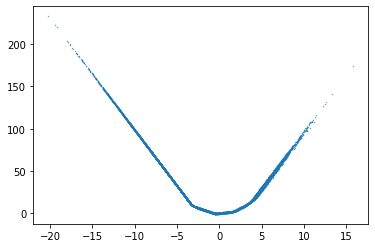

In [441]:
n=-1

plt.scatter([x[0] for x in preds_hist[n]],[x[1] for x in preds_hist[n]], s=0.1, alpha=1)

In [455]:
for n in range(28):
    plt.scatter([x[0] for x in preds_hist[n*10]],[x[1] for x in preds_hist[n*10]], s=0.1, alpha=1)
    plt.savefig('{}.jpg'.format(n))
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [456]:
from PIL import Image
import imageio
from glob import glob

In [457]:
kargs = { 'duration': 0.1 }

In [458]:
images = glob('./*.jpg')

In [459]:
def load_image(path):
    img = Image.open(path)
    array = np.asarray(img)
    return array

In [460]:
imagearr=[]

In [461]:
for x in images:
    imagearr.append(load_image(x))

In [462]:
imageio.mimsave('gan_learning.gif', imagearr, None, **kargs)

In [451]:
generator.save('PepePrayGenerator.h5')

In [452]:
classificator.save('PepePrayClassificator.h5')

In [453]:
gan.save('PepePrayGan.h5')